# Category Targeting Tech Report

## Table of Contents
1. Introduction
    - Overview of category targeting experiments
2. Experiment 1: Category Targeting (LL = 12)
    - PFR
    - P2R
    - Lag-CRP
    - Lag-Rank
    - Category Targeting Success Rate
    - First Transition Lag-CRP
    - Excluding Transitions to First Item
    - Mid-list Transition Lag-CRP
    - Distance CRP
    - Discussion
3. Experiment 2: Category Targeting (LL = 6)
    - PFR
    - P2R
    - Lag-CRP
    - Lag-Rank
    - Category Targeting Success Rate
    - First Transition Lag-CRP
    - Excluding Transitions to First Item
    - Mid-list Transition Lag-CRP
    - Distance CRP
    - Discussion
4. Experiment 3: Block Cat
    - PFR and P2R: Isolates
    - PFR and P2R: Block
    - Lag-CRP: Isolates and Block
    - Lag-Rank
    - Category Targeting Success Rate
    - Conditional Serial Position Curve
    - Looking More Into Isolates
    - Mixed-effects Model
    - Distance CRP
5. Discussion

# I. Introduction

This report aims to summarize the current results of each category targeting experiment conducted thus far, with the main goal of assessing how category cueing events affect temporal organization.

In all experiments, participants are presented with lists of words which are each accompanied by their respective category labels (e.g. FRUIT - Apple). In some trials, participants begin recall by being prompted with the category label of a previously studied word (e.g. FRUIT - _____). 

Prompting recall with a semantic probe, in this case a category label, has been shown to increase the recall of sequential words of the same category, as well as those with high semantic similarity. In a word list containing multiple different semantic categories, Santa et al. (1975) shows that overall recall performance is higher when subjects are prompted with studied categories in blocks of the same category, rather than in a dispersed manner. 

At the same time, however, a large body of research has studied the phenomenon of retrieval-induced forgetting (RIF); recalling certain information may lead to the forgetting of other memories. There are several theories for what gives rise to RIF, with leading explanations relating to inhibition (retrieval practice inhibits interfering items) and context shifts (retrieving information leads to establishment of a new context, decreasing avaialability of older related information). 

While it is clear that semantic associations are unaffected by category cued retrieval of an item, it is unknown how the temporal associations between neighboring list items influence recall. 

Therefore, there is a gap in the research as to how the temporal organization of responses change when subjects are cued with semantic information. Retrieved context models, like CMR, assert that the recall of an item reactivates the temporal context associated with its study event. With retrieved temporal context of a certain portion of the list, this encourages the participant to recall neighboring items (Polyn et al., 2009). 

By this logic, the successful recall of an item cued by its category label should not only encourage the recall of semantically similar items, but also those with similar temporal contexts. Therefore, we'd expect both semantic and temporal contiguity in successive responses. 

The following experiments manipulate both list length and category structure within the list to understand the role of semantic information in episodic memory experiments. 


## Summary of Experiments

### - **Experiment 1: Category Targeting (12)** : 
 - List length (LL) of 12 words, each a category-exemplar word pair (e.g. FRUIT - Apple)
 - No categories repeat between trials
 - Two recall conditions: Control (free recall) or Category-Cued (Any mid-list item (pos. 4-9) cued, followed by free recall)

### - **Experiment 2: Category Targeting (6)** : 
 - Same as experiment 1, but with LL of 6.

### - **Experiment 3: Block Cat**: 
- LL of 15 words, each of unique categories, EXCEPT for same category 'blocks' at pos. 4-6 and 10-12.
- In some trials, participants are asked to recall an item of the category shared by both blocks, and then freely recall the remainder of the list
- In others, participants are asked to recall items that weren't in such blocks, known as 'isolates', or freely recall the entire list.

# II. Experiment 1: Category Targeting (LL = 12)

## Import Dependencies

In [37]:
import os
import sys
sys.path.insert(0, "/Users/roberttornatore/Desktop/JATOS/study_assets_root/online_experiments/category_targeting")
import helpers
from helpers import load_data
from helpers import export_to_psifr_long_table
from psifr import fr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import string

## Load data and merge

In [38]:
# %% Load data
embam_data_path = "experiments/category_targeting/expt1.h5"
embam_data = load_data(embam_data_path)
events = export_to_psifr_long_table(embam_data)

# %% Merge study and recall events
data = fr.merge_free_recall(
    events,
    list_keys=['condition', 'target_success', 'listLength', 'trial_category_cue', 'category']
)

data

,subject,list,item,input,output,study,recall,repeat,intrusion,condition,target_success,listLength,trial_category_cue,category,prior_list,prior_input
0,0,1,146,1,5.0,True,True,0,False,2,True,12,29,9,NaN,NaN
1,0,1,59,2,9.0,True,True,0,False,2,True,12,29,4,NaN,NaN
2,0,1,198,3,2.0,True,True,0,False,2,True,12,29,11,NaN,NaN
3,0,1,232,4,10.0,True,True,0,False,2,True,12,29,13,NaN,NaN
4,0,1,513,5,1.0,True,True,0,False,2,True,12,29,29,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5836,22,20,448,8,12.0,False,True,1,False,2,True,12,21,26,NaN,NaN
5837,22,20,111,9,11.0,True,True,0,False,2,True,12,21,7,NaN,NaN
5838,22,20,232,10,8.0,True,True,0,False,2,True,12,21,13,NaN,NaN
5839,22,20,184,11,9.0,True,True,0,False,2,True,12,21,11,NaN,NaN


# Probability of First Recall

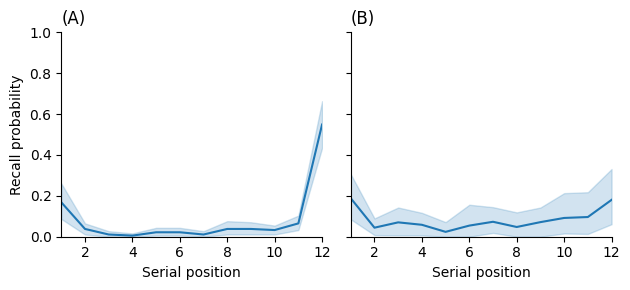

In [39]:
pnr_control = fr.pnr(data.query('condition == 0'))
pnr_attempt = fr.pnr(data.query('condition == 1'))

pnr = pd.concat([
    pnr_control.assign(condition='Free Recall'),
    pnr_attempt.assign(condition='Category Target Failure')
])

pfr = pnr.query('output <= 1')

g = fr.plot_spc(pfr, col='condition', col_wrap=5)

for i, ax in enumerate(g.axes.flat):
    ax.set_title(f'({string.ascii_uppercase[i]})', loc='left', fontsize=12) 
    
    ax.set_xlim(1, 12) 
    
g.set_titles("")

plt.tight_layout()
plt.show()

**Figure 1**: Probability of First Recall (PFR)

The PFR analysis plots the probability of participants' first recall based on serial position. (A) In the control condition, with no category targeting, there are reliable primacy and recency effects. (B) When participants fail to recall the category targeted item, the recency effect is less robust, while primacy remains the same.  

# Probability of Second Recall

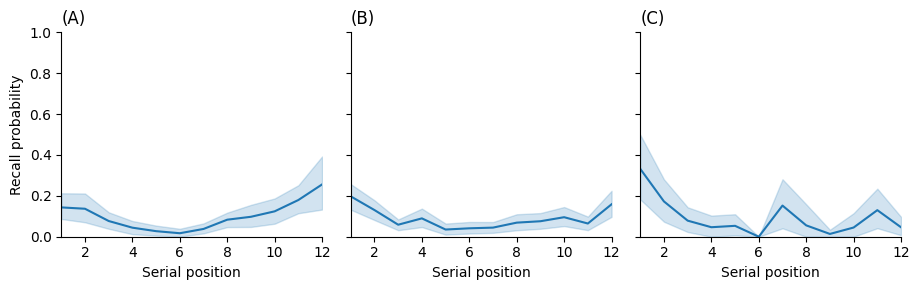

In [40]:
pnr_control = fr.pnr(data.query('condition == 0'))
pnr_success = fr.pnr(data.query('condition == 2'))
pnr_attempt = fr.pnr(data.query('condition == 1'))
pnr = pd.concat([pnr_control.assign(condition='control'), pnr_success.assign(condition='success'), pnr_attempt.assign(condition='failure')])

pfr = pnr.query('output == 2')

g = fr.plot_spc(pfr, col='condition', col_wrap=5)

for i, ax in enumerate(g.axes.flat):
    ax.set_title(f'({string.ascii_uppercase[i]})', loc='left', fontsize=12)
    
    ax.set_xlim(1,12)

g.set_titles("")    

plt.tight_layout()
plt.show()

**Figure 2**: Probability of Second Recall (P2R)

Indicates the probability of second recall based on serial position. (A) During free recall initiation, primacy and recenecy effects remain robust. (B) After a successful category targeting event, recency is less dominant. If we expect temporal-context reinstatement in this condition, we would expect a higher probability of recall surrounding cued mid-list positions, which is not observed. (C) After an unsuccessful category targeting event, there is a marked increase in recall probability surrounding serial position seven. Moreover, the primacy effect is more pronounced.  

# Lag-CRP

(-5.0, 5.0)

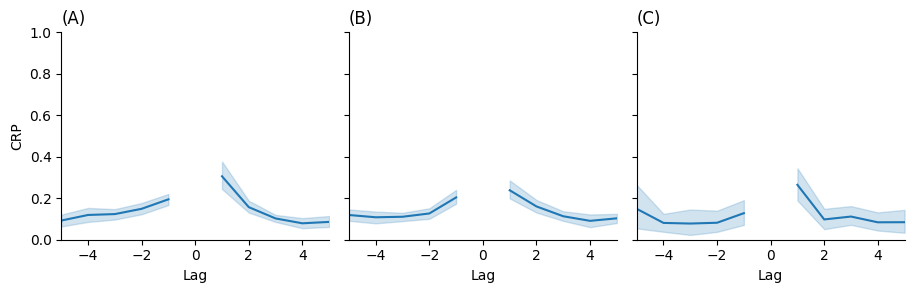

In [41]:
crp_control = fr.lag_crp(data.query('condition == 0'))
crp_success = fr.lag_crp(data.query('condition == 2'))
crp_attempt = fr.lag_crp(data.query('condition == 1'))
lag_crp = pd.concat([crp_control.assign(condition='control'), crp_success.assign(condition='success'), crp_attempt.assign(condition='failure')])


g = fr.plot_lag_crp(lag_crp, col='condition', col_wrap=5)

for i, ax in enumerate(g.axes.flat):
    ax.set_title(f'({string.ascii_uppercase[i]})', loc='left', fontsize=12)

g.set_titles("")

plt.xlim(-5,5)

**Figure 3**: Lag-CRP. 

(A) Lag-based conditional response probability analysis for the control condition, indicating the probability of lag transitions relative to the original study order. Evidence of temporal organization is observed by forward asymmetry. (B) Lag-based conditional response probability analysis after successful category targeting events. Disruption of temporal organization is observed, with a flattened curve relative to the control condition. (C) Lag-based conditional response probability analysis after failure to recall a category cued item. Forward asymmetry returns, implying success in the task may be responsible for weakened temporal organization. 

# Lag-Rank 

In [42]:
ranks_control = fr.lag_rank(data.query('condition == 0'))
ranks_success = fr.lag_rank(data.query('condition == 2'))
ranks_attempt = fr.lag_rank(data.query('condition == 1'))
ranks = pd.concat([ranks_control.assign(condition='control'), ranks_success.assign(condition='success'), ranks_attempt.assign(condition='failure')])

print("Free Recall")
print(ranks_control.agg(['mean', 'sem'])['rank'])
print("Category Target Success")
print(ranks_success.agg(['mean', 'sem'])['rank'])
print("Category Target Failure")
print(ranks_attempt.agg(['mean', 'sem'])['rank'])

from scipy.stats import ttest_ind

control_ranks = ranks.query("condition == 'control'")['rank']
success_ranks = ranks.query("condition == 'success'")['rank']

t_stat, p_value = ttest_ind(control_ranks, success_ranks, equal_var=True)

# Print results
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.4f}")


Free Recall
mean    0.604777
sem     0.013934
Name: rank, dtype: float64
Category Target Success
mean    0.577579
sem     0.017815
Name: rank, dtype: float64
Category Target Failure
mean    0.565450
sem     0.026559
Name: rank, dtype: float64
T-statistic: 1.203
P-value: 0.2356


**Analysis 1** Lag-Rank. 

The Lag-Rank analysis assigns a numerical value to characterize the temporal organization of response sequences, with a score of 0.5 indicating random transitions, and 1.0 implying the closest temporal neighbor was always recalled. Comparing all response sequences in free recall with those after a successful category targeting event, there is no significant difference in the respective temporal organization scores (t=1.203, p=0.2356). 

# First Transition Lag Rank

In [43]:
ranks_control = fr.lag_rank(data.query('condition == 0'), item_query='output < 3 or not recall')
ranks_success = fr.lag_rank(data.query('condition == 2'), item_query='output < 3 or not recall')
ranks_attempt = fr.lag_rank(data.query('condition == 1'), item_query='output < 3 or not recall')
ranks = pd.concat([ranks_control.assign(condition='control'), ranks_success.assign(condition='success'), ranks_attempt.assign(condition='failure')])

print("Free Recall")
print(ranks_control.agg(['mean', 'sem'])['rank'])
print("Category Target Success")
print(ranks_success.agg(['mean', 'sem'])['rank'])
print("Category Target Failure")
print(ranks_attempt.agg(['mean', 'sem'])['rank'])

from scipy.stats import ttest_ind

control_ranks = ranks.query("condition == 'control'")['rank']
success_ranks = ranks.query("condition == 'success'")['rank']

t_stat, p_value = ttest_ind(control_ranks, success_ranks, equal_var=True)

# Print results
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.10f}")

Free Recall
mean    0.660253
sem     0.038300
Name: rank, dtype: float64
Category Target Success
mean    0.405037
sem     0.031157
Name: rank, dtype: float64
Category Target Failure
mean    0.509639
sem     0.069274
Name: rank, dtype: float64
T-statistic: 5.169
P-value: 0.0000055048


**Analysis 2**: First Transition Lag Rank

The first transition Lag-Rank filters out all ouputs made by participants after their first recall transition, giving a better understanding of immediate temporal organization. Comparing these first transitions between the free recall and successful cueing event conditions, we observe a significant difference in the temporal organization score (t = 5.169, p=0.55x10-6). 

# Category Target Recall Rates

In [44]:
success_rates = data.query('condition > 0').pivot_table(
    index='subject', values='target_success', aggfunc='mean')

print(success_rates.agg(['mean', 'sem'])['target_success'])

fail_trials = data.query('condition == 1')
first_outputs = fail_trials.query('output == 1')
first_valid = first_outputs.groupby(['subject', 'list'])['study'].first()
subject_props = first_valid.groupby('subject').mean()
summary = subject_props.agg(['mean', 'sem'])
print(summary)



mean    0.755376
sem     0.040560
Name: target_success, dtype: float64
mean    1.0
sem     0.0
Name: study, dtype: float64


**Analysis 3**: Category Target Success and Failure

Out of all category targeting events, participants were successful in recalling the prompted item 75.5% of the time. When unsuccessful, participants always responded with a valid, previously studied list item (i.e. no prior list intrusions). It is unknown whether the dataframe accounts for a participant skipped the prompt.

# First Transition Lag-CRP

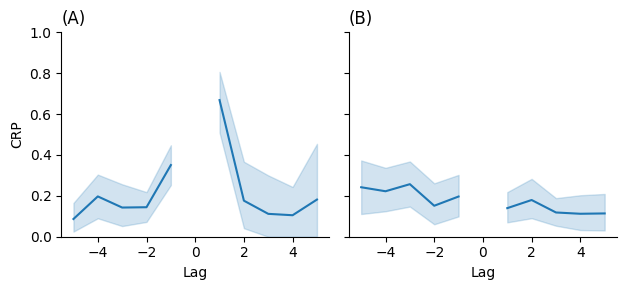

In [45]:
crp_control = fr.lag_crp(data.query('condition == 0'), item_query='output < 3 or not recall')
crp_success = fr.lag_crp(data.query('condition == 2'), item_query='output < 3 or not recall')
lag_crp = pd.concat([crp_control.assign(condition='control'), crp_success.assign(condition='success')])

g = fr.plot_lag_crp(lag_crp, col='condition', col_wrap=5)

for i, ax in enumerate(g.axes.flat):
    ax.set_title(f'({string.ascii_uppercase[i]})', loc='left', fontsize=12)

g.set_titles("")

plt.tight_layout()
plt.show()

**Figure 4**: First Transition Lag-CRP. 

(A) Conditional response probability analysis for the first transition made during free recall. Temporal organization is prominent, with a strong forward asymmetry. (B) Conditional response probability analysis for the first transition made after a successful category targeting event. Temporal organization is largely absent with a roughly equal probability of making any lag transition. Backward transitions seem more favored than forward transitions. 

# Excluding Transitions to First Items

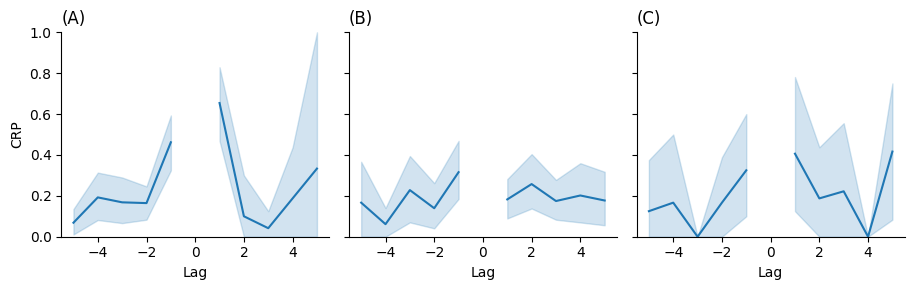

In [46]:
crp_control = fr.lag_crp(data.query('condition == 0'),  item_query='(output < 3 or not recall) and input > 2')
crp_success = fr.lag_crp(data.query('condition == 2'),  item_query='(output < 3 or not recall) and input > 2')
crp_attempt = fr.lag_crp(data.query('condition == 1'),  item_query='(output < 3 or not recall) and input > 2')
lag_crp = pd.concat([crp_control.assign(condition='control'), crp_success.assign(condition='success'), crp_attempt.assign(condition='failure')])

g = fr.plot_lag_crp(lag_crp, col='condition', col_wrap=5)

for i, ax in enumerate(g.axes.flat):
    ax.set_title(f'({string.ascii_uppercase[i]})', loc='left', fontsize=12)

g.set_titles("")

plt.tight_layout()
plt.show()

**Figure 5**: Excluding Transitions to First Items. 

A possible explanation for the observed reduced temporal organization after cueing events is influence from the primacy effect; transitions to neighbors are less likely due to prefential transitions to the early list-items. To test this hypothesis, the conditional response probability analysis was conducted excluding all such first transitions that were to a primacy item. (A) Conditional response probability analysis during free recall. Temporal organization continues to be observed. (B) Conditional response probability analysis after successful category cueing. Temporal organization remains absent. (C) Conditional response probability analysis after failure to recall the category cued item. Temporal organization returns, although reduced compared to the control condition.

# Mid-List Transition Lag-CRP

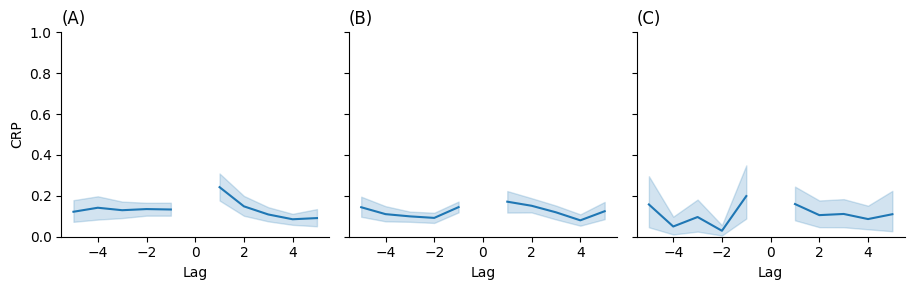

In [11]:
crp_control = fr.lag_crp(
    data.query('condition == 0'), 
    test_key='input', test=lambda x, y: 4 <= x <= 9
)
crp_success = fr.lag_crp(
    data.query('condition == 2'), 
    test_key='input', test=lambda x, y: 4 <= x <= 9
)
crp_attempt = fr.lag_crp(
    data.query('condition == 1'),
    test_key='input', test=lambda x, y: 4 <= x <= 9
)
lag_crp = pd.concat([crp_control.assign(condition='control'), crp_success.assign(condition='success'), crp_attempt.assign(condition='failure')])

g = fr.plot_lag_crp(lag_crp, col='condition', col_wrap=5)

for i, ax in enumerate(g.axes.flat):
    ax.set_title(f'({string.ascii_uppercase[i]})', loc='left', fontsize=12)

g.set_titles("")

plt.tight_layout()
plt.show()

**Figure 6**: Mid-List Transition Lag-CRP. 

To get a more direct comparison between the transitions made after a cueing event and those freely initiated, the conditional response probability analysis was modified such that all transitions began from mid-list items (i.e. those cued by category targets). (A) Modified conditional response probability analysis in free recall. While temporal organization is weaker than in unfiltered free recall, there is still some forward asymmetry. (B) Modified conditional response probability analysis after successful category cueing. Temporal organization is largely absent, espeically when compared to the control condition, implying that sucessful category cueing events themselves are the main drivers of decreased temporal organization in this experiment. (C) Modified conditional response probability analysis after unsuccessful category cueing. Temporal organization appears to return slightly, however with negative asymmetry and more noise. 

# Distance CRP

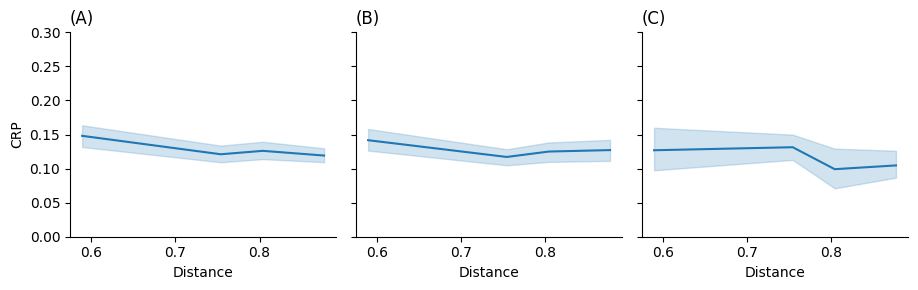

In [12]:
from sentence_transformers import SentenceTransformer
from scipy.spatial.distance import pdist, squareform

with open("/Users/roberttornatore/Desktop/JATOS/study_assets_root/online_experiments/experiments/block_cat/assets/cuefr_pool.txt", "r", encoding="utf-8") as f:
    item_pool = [line.strip().lower() for line in f if line.strip()]

data['item_name'] = data['item'].astype(int).apply(lambda i: item_pool[i - 1])

data['item_name'] = data['item_name'].str.strip().str.lower()

data['item_index'] = fr.pool_index(data['item_name'], item_pool)

model = SentenceTransformer('all-mpnet-base-v2')
embeddings = model.encode(item_pool)
cosine_distances = squareform(pdist(embeddings, metric='cosine'))

edges = np.percentile(squareform(cosine_distances), np.linspace(1, 99, 5))

dist_crp_control = fr.distance_crp(data.query('condition == 0'), 'item_index', cosine_distances, edges)
dist_crp_success = fr.distance_crp(data.query('condition == 2'), 'item_index', cosine_distances, edges)
dist_crp_attempt = fr.distance_crp(data.query('condition == 1'), 'item_index', cosine_distances, edges)

dist_crp = pd.concat([dist_crp_control.assign(condition='control'), dist_crp_success.assign(condition='success'), dist_crp_attempt.assign(condition='failure')])

g = fr.plot_distance_crp(dist_crp, col='condition', col_wrap=5)
g.set(ylim=(0, 0.3))

for i, ax in enumerate(g.axes.flat):
    ax.set_title(f'({string.ascii_uppercase[i]})', loc='left', fontsize=12)

g.set_titles("")

plt.tight_layout()
plt.show()


**Figure 7** Distance CRP.

Indicates the conditional response probability of recalling a word based on semantic similarity, with higher distances denoting lower similarity. (A) Semantic conditional response probability analysis in the control condition. The probability of recalling semantically similar words versus dissimilar words is relatively the same, indicating no strong semantic contiguity. (B) Semantic conditional response probability analysis after successful category targeting. Again, no strong semantic contiguity is observed. (C) Semantic conditional response probability analysis after unsuccessful category targeting. Semantic contiguity remains absent. 

# Experiment 1 Discussion

Here, we see that after participants successfully recall an item that was probed with its respective category label, the temporal

contiguity effect is substantially weakened. When looking at all transitions made after targeting events, **Figure 3** demonstrates that 

overall temporal contiguity is weaker when successful is retrieving targeted items; however, this difference is not significant when 

comparing temporal organization scores. Looking directly at the first transition made after each condition, temporal contiguity is 

markedly weaker after successful category targeting, shown both in **Figure 4**, and with a significant difference between respective Lag 

Rank scores. To rule out primacy effects as the main driver of this decreased temporal organization, all transitions to primacy items 

were excluded from the analysis conducted in **Figure 5**, indicating that temporal contiguity remains weak. For a more direct comparison 

between the transitions made after a successful targeting event and those in the control condition, only transitions made after 

initiating from a mid-list position were analyzed in **Figure 6**, showing that even when free recall is initiated in the middle of the 

list, temporal contoguity remains significantly stronger in the control condition. Looking for semantic contiguity in responses, 

**Figure 7** indicates that semantic relatedness was not a strong predictor of next recall, as conditional response probability remains 

relatively stable across semantic distances. 

# III. Experiment 2: Category Targeting (LL = 6)

## Loading Data

In [61]:
# %% Load data
embam_data_path = "experiments/cat_target_short/expt_milind_pooled.h5"
embam_data = load_data(embam_data_path)
events = export_to_psifr_long_table(embam_data)

# %% Merge study and recall events
data = fr.merge_free_recall(
    events,
    list_keys=['condition', 'target_success', 'listLength', 'trial_category_cue', 'category']
)

# Probability of First Recall

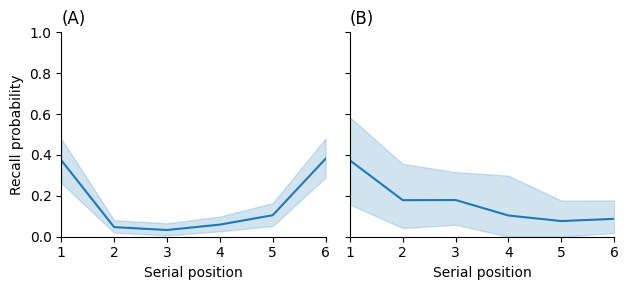

In [50]:
pnr_control = fr.pnr(data.query('condition == 0'))
pnr_attempt = fr.pnr(data.query('condition == 1'))
pnr = pd.concat([pnr_control.assign(condition='control'),  pnr_attempt.assign(condition='failure')])

pfr = pnr.query('output <= 1')

g = fr.plot_spc(pfr, col='condition', col_wrap=5)

for i, ax in enumerate(g.axes.flat):
    ax.set_title(f'({string.ascii_uppercase[i]})', loc='left', fontsize=12)
    
    ax.set_xlim(1,6)

g.set_titles("")    

plt.tight_layout()
plt.show()

**Figure 8**: Probability of First Recall (PFR). 

(A) Probability of first recall after free recall initiation. Recall is dominated by primacy and recency effects. (B) Probability of first recall after failing to retrieve the category targeted item. The recency effect is absent with primacy still predominant. 

# Probability of Second Recall

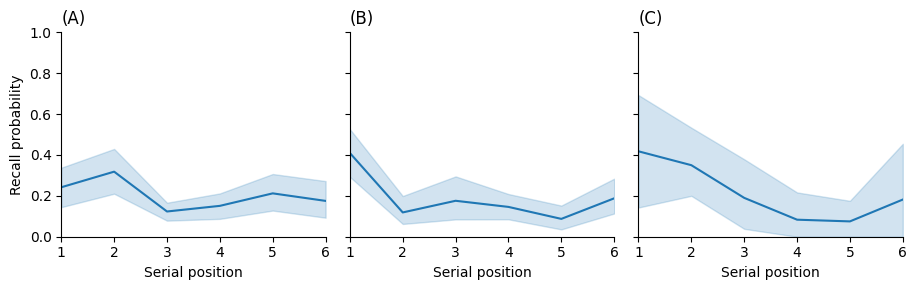

In [51]:
pnr_control = fr.pnr(data.query('condition == 0'))
pnr_success = fr.pnr(data.query('condition == 2'))
pnr_attempt = fr.pnr(data.query('condition == 1'))
pnr = pd.concat([pnr_control.assign(condition='control'), pnr_success.assign(condition='success'), pnr_attempt.assign(condition='failure')])

pfr = pnr.query('output == 2')

g = fr.plot_spc(pfr, col='condition', col_wrap=5)

for i, ax in enumerate(g.axes.flat):
    ax.set_title(f'({string.ascii_uppercase[i]})', loc='left', fontsize=12)
    
    ax.set_xlim(1,6)

g.set_titles("")    

plt.tight_layout()
plt.show()

**Figure 9**: Probability of Second Recall. 

Similarly to the previous experiment, if we expect temporal-context reinstatement after successful category cueing, then we would likewise expect an increased probability of recalling mid-list items. (A) Probability of second recall in the control condition. A primacy effect is still observed. (B) Probability of second recall after successful category cueing. There seems to be a slight increase in recall probability of mid-list items compared to the control condition, although not significant. Primacy and recency appears to continue to outweigh it. (C) Probability of second recall after unsuccessful category cueing. The primacy effect remains strong, with some increased recall probability for serial position three. 

# Lag-CRP

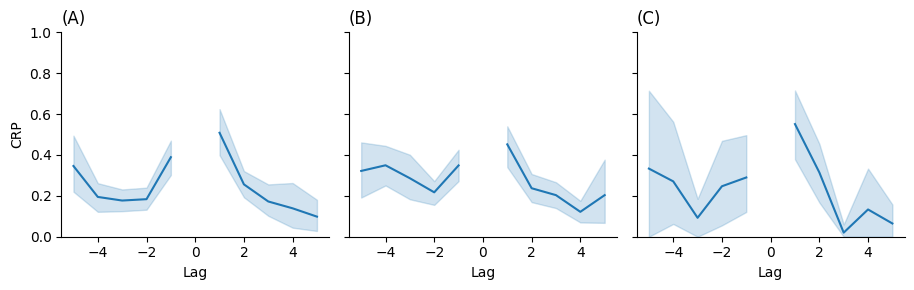

In [53]:
crp_control = fr.lag_crp(data.query('condition == 0'))
crp_success = fr.lag_crp(data.query('condition == 2'))
crp_attempt = fr.lag_crp(data.query('condition == 1'))
lag_crp = pd.concat([crp_control.assign(condition='control'), crp_success.assign(condition='success'), crp_attempt.assign(condition='failure')])

g = fr.plot_lag_crp(lag_crp, col='condition', col_wrap=5)

for i, ax in enumerate(g.axes.flat):
    ax.set_title(f'({string.ascii_uppercase[i]})', loc='left', fontsize=12)
    

g.set_titles("")    

plt.tight_layout()
plt.show()

**Figure 10**: Lag-CRP. 

(A) Lag-based conditional response probability in the control condition. Temporal contiguity is observed with a forward asymmetry. High conditional response probability for -5 transitions indicates transitions from recency to primacy items. (B) Lag-based conditional response probability after successful category cueing. Temporal contiguity is weaker compared to the control condition, although stronger than that observed in the previous experiment. (C) Lag-based conditional response probability after failure to recall the category cued item. Temporal contiguity is stronger than after successful cued recall, and with a sharper forward asymmetry than the control condition. This may be due to insufficient data. 

# Lag-Rank 

In [55]:
ranks_control = fr.lag_rank(data.query('condition == 0'))
ranks_success = fr.lag_rank(data.query('condition == 2'))
ranks_attempt = fr.lag_rank(data.query('condition == 1'))
ranks = pd.concat([ranks_control.assign(condition='control'), ranks_success.assign(condition='success'), ranks_attempt.assign(condition='failure')])

print("control")
print(ranks_control.agg(['mean', 'sem'])['rank'])
print("success")
print(ranks_success.agg(['mean', 'sem'])['rank'])
print("failure")
print(ranks_attempt.agg(['mean', 'sem'])['rank'])

from scipy.stats import ttest_ind

control_ranks = ranks.query("condition == 'control'")['rank']
success_ranks = ranks.query("condition == 'success'")['rank']
failure_ranks = ranks.query("condition == 'failure'")['rank']

t_stat, p_value = ttest_ind(control_ranks, success_ranks, equal_var=True)

# Print results
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.4f}")

t_stat, p_value = ttest_ind(control_ranks, failure_ranks, equal_var=True)

# Print results
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.4f}")

control
mean    0.649128
sem     0.030577
Name: rank, dtype: float64
success
mean    0.629084
sem     0.028654
Name: rank, dtype: float64
failure
mean    0.719213
sem     0.058255
Name: rank, dtype: float64
T-statistic: 0.478
P-value: 0.6353
T-statistic: -1.176
P-value: 0.2496


**Analysis 4**: Lag-Rank. 

An independent samples t-test found that there is no signiifcant difference in the temporal organization score between the free recall initiation and successful category targeting conditions (t=0.748, p=0.6353). Moreover, there was likewise no significant difference between the control condition and failure condition (t=-1.176, 0.2496). 

# Category Targeting Success Rate

In [57]:
success_rates = data.query('condition > 0').pivot_table(
    index='subject', values='target_success', aggfunc='mean')

print(success_rates.agg(['mean', 'sem'])['target_success'])

fail_trials = data.query('condition == 1')
first_outputs = fail_trials.query('output == 1')
first_valid = first_outputs.groupby(['subject', 'list'])['study'].first()
subject_props = first_valid.groupby('subject').mean()
summary = subject_props.agg(['mean', 'sem'])
print(summary)

mean    0.825433
sem     0.055258
Name: target_success, dtype: float64
mean    1.0
sem     0.0
Name: study, dtype: float64


**Analysis 5**: Category Target Recall Success. 

Participants successfully recalled cued category items around 82% of the time, indicating no issues with the category targeting mechanism during cued recall. Again, each time a participant failed to recall the category cued item, a valid list item was the first response, indicating no intrusions. 

# First Transition Lag-CRP

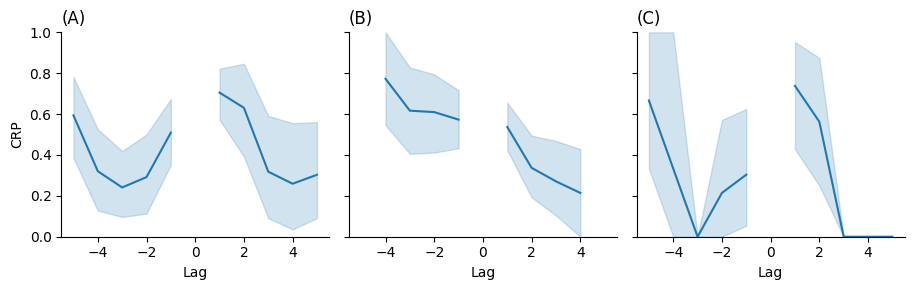

In [58]:
crp_control = fr.lag_crp(data.query('condition == 0'), item_query='output < 3 or not recall')
crp_success = fr.lag_crp(data.query('condition == 2'), item_query='output < 3 or not recall')
crp_attempt = fr.lag_crp(data.query('condition == 1'), item_query='output < 3 or not recall')
lag_crp = pd.concat([crp_control.assign(condition='control'), crp_success.assign(condition='success'), crp_attempt.assign(condition='failure')])

g = fr.plot_lag_crp(lag_crp, col='condition', col_wrap=5)

for i, ax in enumerate(g.axes.flat):
    ax.set_title(f'({string.ascii_uppercase[i]})', loc='left', fontsize=12)
    
g.set_titles("")    
plt.tight_layout()
plt.show()

**Figure 11**: First Transition Lag-CRP. 

Lag-based conditional response probability of the first transition made in each trial. (A) Temporal contiguity in the control condition is observed with strong forward asymmetry. A high response probability for -5 transitions indicates transitions to the first list-item. (B) Temporal contiguity is disrupted as -4 transitions have the highest response probability. -5 lag transitions are not possible as positions 2 through 5 are cued in this condition. (C) Some temporal contoguity returns in when participants fail to recall the category cued item, still favoring transitions to primacy items.  

# Excluding Transitions to First Item

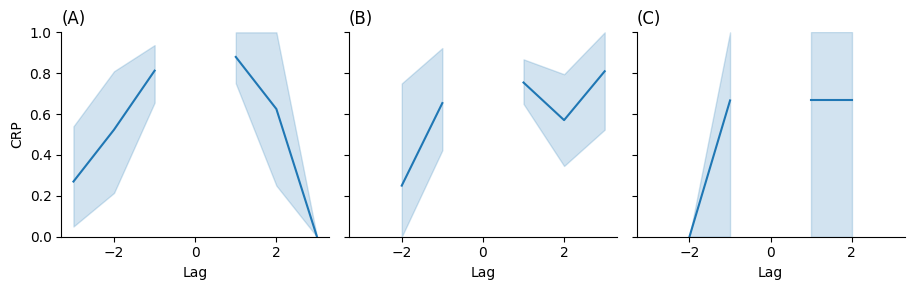

In [59]:
crp_control = fr.lag_crp(data.query('condition == 0'),  item_query='(output < 3 or not recall) and input > 2')
crp_success = fr.lag_crp(data.query('condition == 2'),  item_query='(output < 3 or not recall) and input > 2')
crp_attempt = fr.lag_crp(data.query('condition == 1'),  item_query='(output < 3 or not recall) and input > 2')
lag_crp = pd.concat([crp_control.assign(condition='control'), crp_success.assign(condition='success'), crp_attempt.assign(condition='failure')])

g = fr.plot_lag_crp(lag_crp, col='condition', col_wrap=5)

for i, ax in enumerate(g.axes.flat):
    ax.set_title(f'({string.ascii_uppercase[i]})', loc='left', fontsize=12)
    

g.set_titles("")    
plt.tight_layout()
plt.show()


**Figure 12**: Exlcuding Transitions to First Item. 

Lag-based conditional response probability of the first transition made, excluding those transitions which were to primacy items. (A) Temporal contiguity appears consistent in the control condition with +1/-1 transitions favored in the control condition. (B) There appears to be some temporal contiguity although not as strong as in the control condition. -3 transitions are not possible since we are filtering outputs to be greater than 2 (pos. 2-5 are cued). (C) Unclear what the message of this figure is, may want to scrap it. 

# Mid-List Transition Lag-CRP

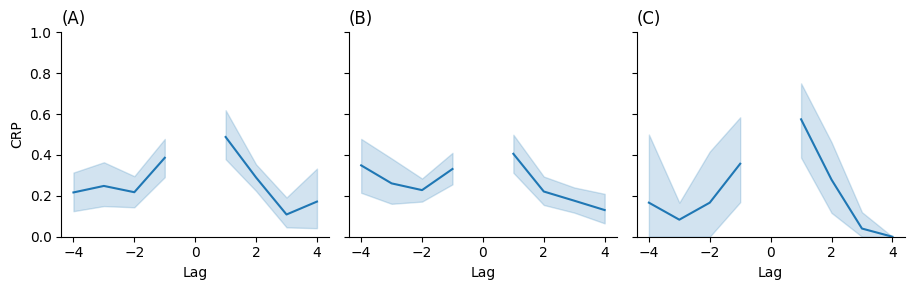

In [63]:
crp_control = fr.lag_crp(
    data.query('condition == 0'), 
    test_key='input', test=lambda x, y: 2 <= x <= 5
)
crp_success = fr.lag_crp(
    data.query('condition == 2'), 
    test_key='input', test=lambda x, y: 2 <= x <= 5
)
crp_attempt = fr.lag_crp(
    data.query('condition == 1'),
    test_key='input', test=lambda x, y: 2 <= x <= 5
)
lag_crp = pd.concat([crp_control.assign(condition='control'), crp_success.assign(condition='success'), crp_attempt.assign(condition='failure')])

g = fr.plot_lag_crp(lag_crp, col='condition', col_wrap=5)

for i, ax in enumerate(g.axes.flat):
    ax.set_title(f'({string.ascii_uppercase[i]})', loc='left', fontsize=12)
    

g.set_titles("")    
plt.tight_layout()
plt.show()


**Figure 13**: From-Mid-List Transition Lag-CRP. 

Lag-based conditional response probability when the first transition is from mid-list. (A) Temporal contiguity observed in the control condition where the first recall is freely initiated. When started in a mid-list serial position, temporal organization is present. (B) After successful category cueing, temporal organization is present but weaker than in the control condition. (C) Temporal contiguity returns when participants fail to recall the cued item. 

# Analysis 9: Distance CRP

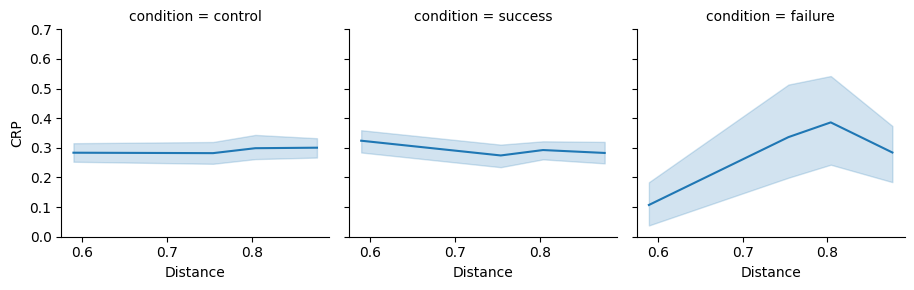

In [64]:
from sentence_transformers import SentenceTransformer
from scipy.spatial.distance import pdist, squareform

with open("/Users/roberttornatore/Desktop/JATOS/study_assets_root/online_experiments/experiments/block_cat/assets/cuefr_pool.txt", "r", encoding="utf-8") as f:
    item_pool = [line.strip().lower() for line in f if line.strip()]

data['item_name'] = data['item'].astype(int).apply(lambda i: item_pool[i - 1])

data['item_name'] = data['item_name'].str.strip().str.lower()

data['item_index'] = fr.pool_index(data['item_name'], item_pool)

model = SentenceTransformer('all-mpnet-base-v2')
embeddings = model.encode(item_pool)
cosine_distances = squareform(pdist(embeddings, metric='cosine'))

edges = np.percentile(squareform(cosine_distances), np.linspace(1, 99, 5))

dist_crp_control = fr.distance_crp(data.query('condition == 0'), 'item_index', cosine_distances, edges)
dist_crp_success = fr.distance_crp(data.query('condition == 2'), 'item_index', cosine_distances, edges)
dist_crp_attempt = fr.distance_crp(data.query('condition == 1'), 'item_index', cosine_distances, edges)

dist_crp = pd.concat([dist_crp_control.assign(condition='control'), dist_crp_success.assign(condition='success'), dist_crp_attempt.assign(condition='failure')])

g = fr.plot_distance_crp(dist_crp, col='condition', col_wrap=5)
g.set(ylim=(0, 0.7))

**Figure 14** Distance CRP.

Semantic-based conditional response probability analysis. (A) When recall is freely initiated, response probability is completely independent of semantic distance. (B) When successfully recalling cued items, there seems to be a slight decrease in response probability as distance increases, implying weak semantic contiguity. (C) Abnormal semantic contiguity when participants fail to remember the cued item.

## Experiment 2 Discussion

After catgeory targeting (12), it was hypothesized that prefential transitions to primacy and recency items was masking the reinstatement of temporal context around category cued mid-list items. To combat this, the list length was reduced by half to decrease the relative strength of primacy and recency effects. However, we still observe markedly weaker temporal contiguity after targeting events compared to when recall is initiated freely. 

# IV. Experiment 3: Block Cat

## Determining Trial Category Labels and DF Structure

In [65]:
def get_trial_category_labels(
    category_cues: np.ndarray,
    pres_categoryids: np.ndarray,
) -> list[str]:
    """
    Determine trial category labels ("block", "isolate", "control") based on 
    how many times the cued category appears in the presented categories.

    Args:
        category_cues (np.ndarray): shape [n_trials, 1], category ID cue for each trial
        pres_categoryids (np.ndarray): shape [n_trials, n_items], category ID for each study item

    Returns:
        list[str]: one label per trial
    """
    labels = []
    for cue_cat, pres_cats in zip(category_cues[:, 0], pres_categoryids):
        matches = np.sum(pres_cats == cue_cat)
        if matches == 0:
            label = "control"
        elif matches == 1:
            print(f"Isolate: {cue_cat} {pres_cats}")
            label = "isolate"
        else:
            print(f"Block: {cue_cat} {pres_cats}")
            label = "block"
        labels.append(label)
    return labels

def get_block_success_group(
    target_success: np.ndarray,
    cue_type: list[str],
    recalls: np.ndarray,
) -> list[int]:
    """
    Returns a trial-level feature:
    - 0 if not a successful block-cue targeting trial
    - 1 if first recalled item was studied in position 4-6
    - 2 if first recalled item was studied in position 10-12
    """

    labels = []
    for success, cue, recall_positions in zip(target_success[:, 0], cue_type, recalls):
        if not (success and cue == "block"):
            labels.append(0)
            continue

        first_pos = next((pos for pos in recall_positions if pos > 0), 0)
        if first_pos in [4, 5, 6]:
            labels.append(1)
        elif first_pos in [10, 11, 12]:
            labels.append(2)
        else:
            labels.append(0)

    return labels

def get_isolate_cue_position(
    category_cues: np.ndarray,
    pres_categoryids: np.ndarray,
) -> list[float]:
    """
    Determine which input position (2, 8, 14) was cued on isolate trials.
    Returns NaN for non-isolate trials.

    Args:
        category_cues (np.ndarray): shape [n_trials, 1], cued category
        pres_categoryids (np.ndarray): shape [n_trials, n_items], presented category IDs

    Returns:
        list[float]: position of cued isolate, or NaN if not isolate
    """
    positions = []
    for cue_cat, pres_cats in zip(category_cues[:, 0], pres_categoryids):
        matches = np.where(pres_cats == cue_cat)[0]
        if len(matches) == 1:
            pos = matches[0] + 1  # convert from 0-based to 1-based
            if pos in [2, 8, 14]:
                positions.append(pos)
            else:
                positions.append(float("nan"))  # Unexpected isolate location
        else:
            positions.append(float("nan"))
    return positions


def export_to_psifr_long_table(data: dict[str, np.ndarray]) -> pd.DataFrame:
    """Convert data in EMBAM format to long table psifr format.

    Args:
        data (dict[str, np.ndarray]): Data in EMBAM format. In EMBAM format, data is stored
        in a dictionary where each key corresponds to a different variable. The values are
        2-D numpy arrays where each row corresponds to a trial. Required fields in the EMBAM
        format are: 'subject', 'listLength', 'pres_itemnos', 'recalls'. Additional fields
        such as 'condition', 'pres_itemids', and 'rec_itemids' can identify details about
        the trial or each presented or recalled item.

    Returns:
        pd.DataFrame: A pandas DataFrame whose rows correspond to a single study or recall
        event. The required fields in each row are 'subject', 'list', 'trial_type', 'position',
        and 'item'. Additional fields can be included to describe events, e.g., 'condition'.
    """
    events = {
        "subject": [],
        "list": [],
        "trial_type": [],
        "position": [],
        "item": [],
        "condition": [],
        "target_success": [],
        "listLength": [],
        "trial_category_cue": [],
        "category": [],
        "cue_type": [],
        "block_success_group": [],
        "cue_isolate_position": [],
    }

    # precompute per-trial cue labels to reuse for both study and recall events
    trial_labels = get_trial_category_labels(
        data["category_cues"],
        data["pres_categoryids"],
    )
    block_success_group = get_block_success_group(
        data["target_success"],
        trial_labels,
        data['recalls'],
    )
    isolate_cue_positions = get_isolate_cue_position(
        data["category_cues"],
        data["pres_categoryids"],
    )
   
    # first all study events
    for trial_index, trial in enumerate(data["pres_itemids"]):
        for study_index, item in enumerate(trial):
            if item == 0:
                continue
            events["subject"].append(data["subject"][trial_index][0])
            events["list"].append(data["block"][trial_index][0])
            events["trial_type"].append("study")
            events["position"].append(study_index + 1)
            events["item"].append(item)
            events["condition"].append(data["condition"][trial_index][0])
            events["target_success"].append(data["target_success"][trial_index][0])
            events["listLength"].append(data["listLength"][trial_index][0])
            events["trial_category_cue"].append(data["category_cues"][trial_index][0])
            events["category"].append(
                data["pres_categoryids"][trial_index, study_index]
            )
            events["cue_type"].append(trial_labels[trial_index])
            events["block_success_group"].append(block_success_group[trial_index])
            events["cue_isolate_position"].append(isolate_cue_positions[trial_index])

    # then all recall events
    for trial_index, trial in enumerate(data["rec_itemids"]):
        for recall_index, item in enumerate(trial):
            if item == 0:
                continue
            events["subject"].append(data["subject"][trial_index][0])
            events["list"].append(data["block"][trial_index][0])
            events["trial_type"].append("recall")
            events["position"].append(recall_index + 1)
            events["item"].append(item)
            events["condition"].append(data["condition"][trial_index][0])
            events["target_success"].append(data["target_success"][trial_index][0])
            events["listLength"].append(data["listLength"][trial_index][0])
            events["trial_category_cue"].append(data["category_cues"][trial_index][0])
            events["category"].append(
                data["rec_categoryids"][trial_index, recall_index]
            )
            events["cue_type"].append(trial_labels[trial_index])
            events["block_success_group"].append(block_success_group[trial_index])
            events["cue_isolate_position"].append(isolate_cue_positions[trial_index])

    return pd.DataFrame.from_dict(events)


In [66]:
embam_data_path = "experiments/block_cat/2025_04_10_block_cat.h5"
embam_data = load_data(embam_data_path)
events = export_to_psifr_long_table(embam_data)


Block: 26 [18 11  8 26 26 26  5 25  1 26 26 26 31 22 15]
Block: 10 [29 23 28 10 10 10  6  4 32 10 10 10 13  2 24]
Block: 7 [ 5 26 25  7  7  7 17 20 14  7  7  7 27 22  8]
Block: 25 [12 22 30 25 25 25 17 18  1 25 25 25  2  4 26]
Block: 19 [ 9 24 31 19 19 19  6 27  8 19 19 19  5 10 13]
Block: 7 [ 5 13 27  7  7  7 14 19  9  7  7  7 20  6 10]
Isolate: 25 [28 30  4 29 29 29 16 25 11 29 29 29 24  8 23]
Isolate: 19 [32 19  9 12 12 12 27  7 22 12 12 12 15  5 10]
Block: 14 [ 3  6 13 14 14 14 29 18  2 14 14 14 20 16  4]
Isolate: 20 [ 3  7 18 10 10 10  5  8 19 10 10 10 22 20  1]
Block: 25 [ 4 23 32 25 25 25 17 26 13 25 25 25 15 30 28]
Block: 1 [20 15 14  1  1  1 18  2  6  1  1  1 27 11 19]
Isolate: 14 [11 14  9  5  5  5 30 19 22  5  5  5 15  8 16]
Block: 23 [27 20  2 23 23 23 24 21  6 23 23 23 17  4 18]
Block: 16 [25 10 30 16 16 16 14 26  3 16 16 16  5 19 12]
Isolate: 8 [13 20 23 21 21 21  6  8 27 21 21 21  7 24 18]
Block: 14 [ 2 31 11 14 14 14 15 26 12 14 14 14 32 22  9]
Block: 27 [25  8 13 27 27

In [67]:
data = fr.merge_free_recall(
    events,
    list_keys=[
        "condition",
        "target_success",
        "listLength",
        "trial_category_cue",
        "category",
        "cue_type",
        "block_success_group",
        "cue_isolate_position"
    ],
)

# Probability of First and Second Recall: Isolates and Control

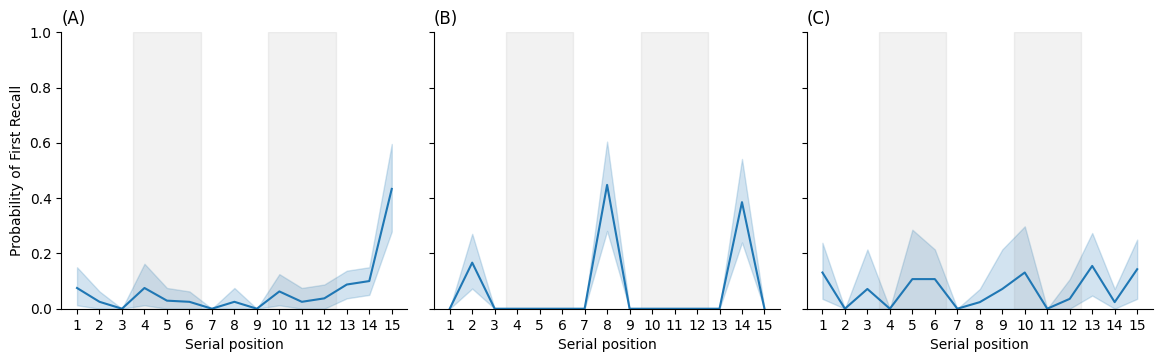

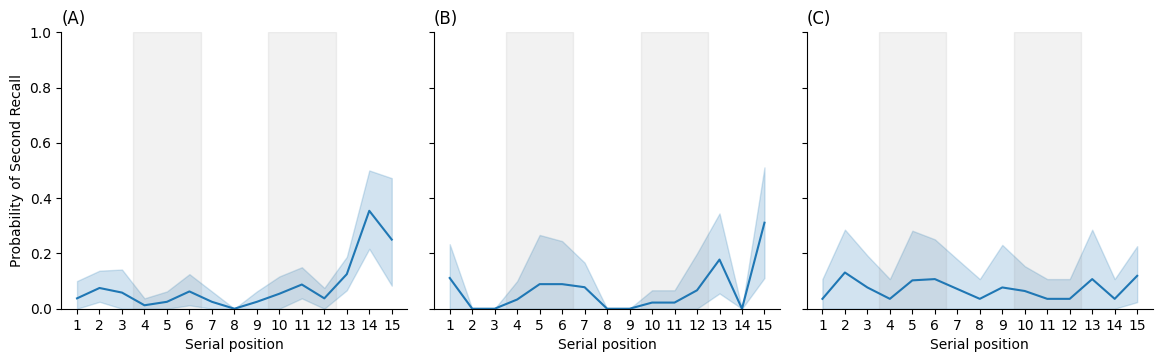

In [70]:
from string import ascii_uppercase

pnr_control = fr.pnr(data.query('cue_type == "control"'))
pnr_isolate_success = fr.pnr(data.query('cue_type == "isolate" and target_success == 1'))
pnr_isolate_failure = fr.pnr(data.query('cue_type == "isolate" and target_success == 0'))

pnr = pd.concat([
    pnr_control.assign(condition="control"),
    pnr_isolate_success.assign(condition="isolate_success"),
    pnr_isolate_failure.assign(condition="isolate_failure"),
])

pfr = pnr.query("output <= 1")
g = fr.plot_spc(pfr, col="condition", col_wrap=3) 
g.fig.set_size_inches(12, 4)
g.set_titles("")
g.set_ylabels("Probability of First Recall")

for i, ax in enumerate(g.axes.flat):
    ax.set_xticks(np.arange(1, 16))
    ax.set_xticklabels([str(i) for i in range(1, 16)])
    
    ax.axvspan(3.5, 6.5, color="gray", alpha=0.1)
    ax.axvspan(9.5, 12.5, color="gray", alpha=0.1)
    
    ax.set_title(f'({ascii_uppercase[i]})', loc='left', fontsize=12)


p2r = pnr.query("output == 2")

g = fr.plot_spc(p2r, col="condition", col_wrap=3)
g.fig.set_size_inches(12, 4)
g.set_titles("")  # Remove default titles
g.set_ylabels("Probability of Second Recall")

for i, ax in enumerate(g.axes.flat):
    ax.set_xticks(np.arange(1, 16))
    ax.set_xticklabels([str(i) for i in range(1, 16)])
    
    ax.axvspan(3.5, 6.5, color="gray", alpha=0.1)
    ax.axvspan(9.5, 12.5, color="gray", alpha=0.1)
    
    ax.set_title(f'({ascii_uppercase[i]})', loc='left', fontsize=12)


**Figures 15**: Probability of First Recall: Control and Isolates

Note. Block positions (4-6) and (10-12) are highlighted. 

Probability of first recall in the control and isolate targeting conditions by serial position. (A) Probability of first recall in control condition. A strong recency effect is observed. (B) Probability of first recall when participants successfully recall the category cued item at positions two, eight, or fourteen. (C) Probability of first recall when participants fail to recall the category cued item. 

**Figure 16**: Probability of Second Recall: Control and Isolates

Probability of second recall in the isolate and control conditions by serial position. (A) Probability of second recall when participants freely initiate recall. Recency effect remains robust. (B) Probability of second recall after successfully recalling the category cued item. If we expect temporal context reinstatement after successful cued recall, then we would likewise expect the rate of recall to be higher around those cued positions. The probability of second recall curve in these circumstances look similar to the control condition and don't necessarily indicate that neighboring positions are preferentially recalled. (C) Probability of second recall after failing to recall the category-cued item. Recall probability appears even across serial position. 


# Analysis 2: Probability of First and Second Recall: Block-cued

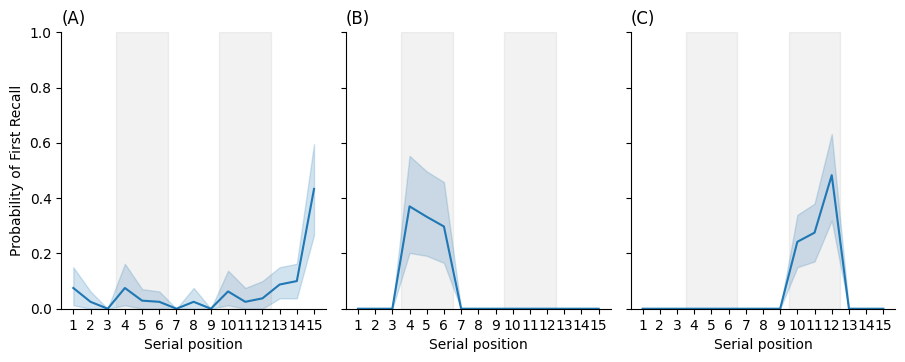

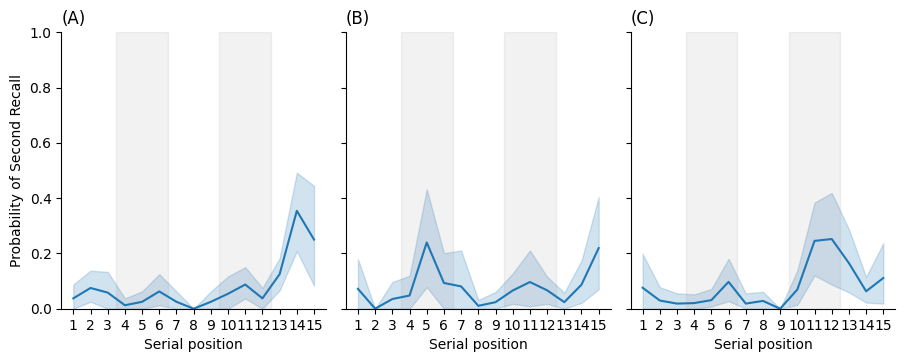

In [71]:
# %% PFR

pnr_control = fr.pnr(data.query('cue_type == "control"'))
pnr_block1_success = fr.pnr(data.query('block_success_group == 1'))
pnr_block2_success = fr.pnr(data.query('block_success_group == 2'))

pnr = pd.concat(
    [
        pnr_control.assign(condition="control"),
        pnr_block1_success.assign(condition="block1_success"),
        pnr_block2_success.assign(condition="block2_success"),
    ]
)

pfr = pnr.query("output <= 1")
g = fr.plot_spc(pfr, col="condition", col_wrap=4)
g.fig.set_size_inches(12, 4)
g.set_titles("")
g.set_ylabels("Probability of First Recall")

for i, ax in enumerate(g.axes.flat):
    ax.set_xticks(np.arange(1, 16))
    ax.set_xticklabels([str(i) for i in range(1, 16)])
    
    ax.axvspan(3.5, 6.5, color="gray", alpha=0.1)
    ax.axvspan(9.5, 12.5, color="gray", alpha=0.1)
    
    ax.set_title(f'({ascii_uppercase[i]})', loc='left', fontsize=12)

p2r = pnr.query("output == 2")
g = fr.plot_spc(p2r, col="condition", col_wrap=4)

g.fig.set_size_inches(12, 4)
g.set_titles("")
g.set_ylabels("Probability of Second Recall")

for i, ax in enumerate(g.axes.flat):
    ax.set_xticks(np.arange(1, 16))
    ax.set_xticklabels([str(i) for i in range(1, 16)])
    
    ax.axvspan(3.5, 6.5, color="gray", alpha=0.1)
    ax.axvspan(9.5, 12.5, color="gray", alpha=0.1)
    
    ax.set_title(f'({ascii_uppercase[i]})', loc='left', fontsize=12)

**Analysis 2**: PFR & P2R for Block-cued. 

Here we see the PFR and P2R curves for the block-cued trials. This is confirmed when looking at the block one and block two success panels. For each block trial, the category shared by items 4-6 and 10-12 are cued, with each individual condition dependending on which block the participant actually initiated recall in. If they reponsded with item 5, they are grouped into the block one success group, and vice versa for the other block positions. 

The P2R is indicative of there potentially being a temporal contextual reinstatement effect. If we expect temporal context is reinstated after successful category targeting, then we likewise expect there to be a higher recall probability of items in the same block as the initially recalled item.

For example, suppose a participant is cued with a block category, and then responds with item 10. The P2R is suggestive that they have a higher probability of recalling items within that second block, as opposed to same category items in the first block.

This implies that there may be some temporal contextual reinstatement guiding responses. If there was a purely semantic recall mechanism ocurring, we would expect there to be an equal chance of remembering any of the shared block category items.

However, more work must be done to confirm whether there is a significant reinstatement of temporal context independent of list position effects. 

# Analysis 3: Lag-CRP for Block and Isolate Conditions

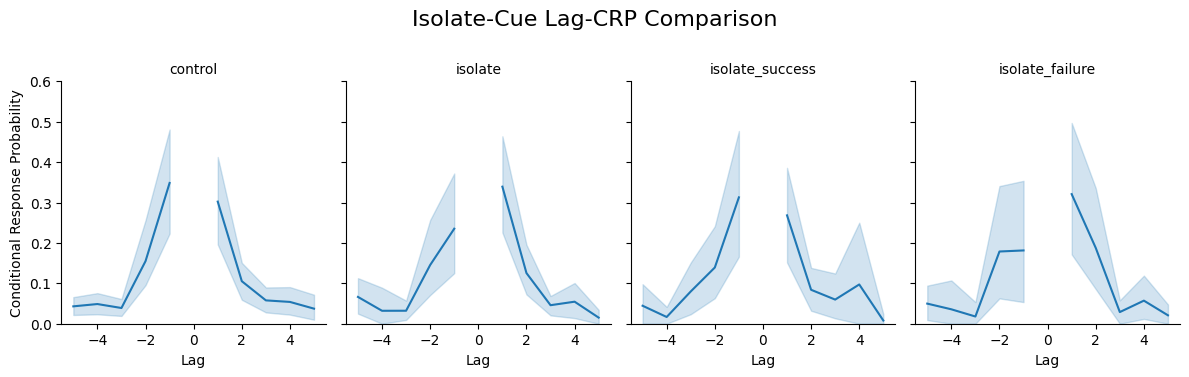

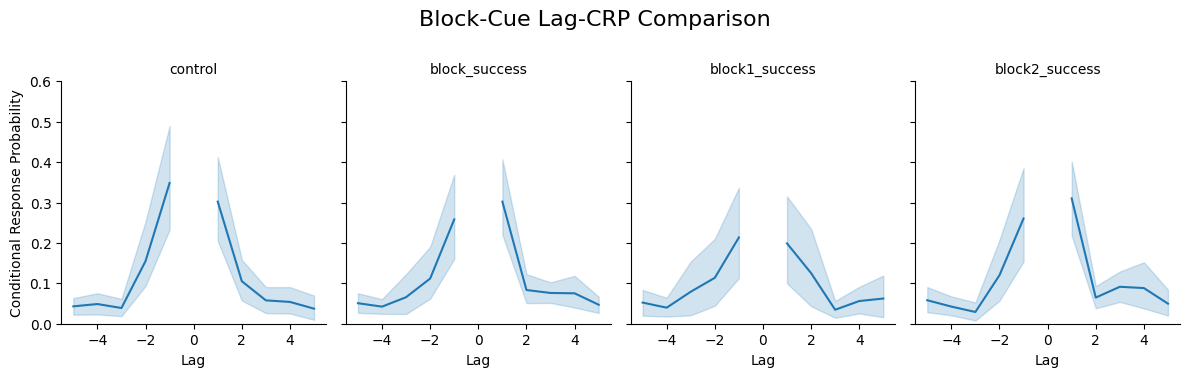

In [28]:
# %% Lag-CRP: Isolates-Focused

crp_control = fr.lag_crp(data.query('cue_type == "control"'))

crp_isolate = fr.lag_crp(data.query('cue_type == "isolate"'))
crp_isolate_success = fr.lag_crp(data.query('cue_type == "isolate" and target_success == 1'))
crp_isolate_failure = fr.lag_crp(data.query('cue_type == "isolate" and target_success == 0'))

lag_crp = pd.concat([
    crp_control.assign(condition="control"),
    crp_isolate.assign(condition="isolate"),
    crp_isolate_success.assign(condition="isolate_success"),
    crp_isolate_failure.assign(condition="isolate_failure"),
])

g = fr.plot_lag_crp(lag_crp, col="condition", col_wrap=4)
g.fig.set_size_inches(12, 4)
plt.ylim([0, 0.6])
g.set_ylabels("Conditional Response Probability")
g.set_titles("{col_name}")

# Add an overall title
g.fig.suptitle("Isolate-Cue Lag-CRP Comparison", fontsize=16)
g.fig.subplots_adjust(top=0.80)

# %% Lag-CRP: Block-Cue Focused

crp_control = fr.lag_crp(data.query('cue_type == "control"'))
crp_block_success = fr.lag_crp(data.query('block_success_group > 0'))
crp_block1_success = fr.lag_crp(data.query('block_success_group == 1'))
crp_block2_success = fr.lag_crp(data.query('block_success_group == 2'))

# Combine with condition labels
lag_crp = pd.concat([
    crp_control.assign(condition="control"),
    crp_block_success.assign(condition="block_success"),
    crp_block1_success.assign(condition="block1_success"),
    crp_block2_success.assign(condition="block2_success"),
])

g = fr.plot_lag_crp(lag_crp, col="condition", col_wrap=4)
g.fig.set_size_inches(12, 4)
plt.ylim([0, 0.6])
g.set_ylabels("Conditional Response Probability")
g.set_titles("{col_name}")

g.fig.suptitle("Block-Cue Lag-CRP Comparison", fontsize=16)
g.fig.subplots_adjust(top=0.80)

**Analysis 3**: Lag-CRP analysis for Block and Isolate Cues. 

Compared to both previous experiments thus far, we observe a more normal looking lag-CRP in both cueing conditions. This suggests that temporal contiguity may be returning after a cueing event. There seems to be a stronger effect in the isolate conditions, however, work must be done to determine whether this increase in temporal contiguity is significant. 

Interestingly, there seems to be a slight negative asymmetry in some cases, like the control condition and isolate success condition. 

# Analysis 4: Lag-Rank for Blocks

In [29]:
# %% Lag-Rank Analysis (block-focused)

ranks_control = fr.lag_rank(data.query('cue_type == "control"'))
ranks_block_success = fr.lag_rank(data.query('block_success_group > 0'))
ranks_block1_success = fr.lag_rank(data.query('block_success_group == 1'))
ranks_block2_success = fr.lag_rank(data.query('block_success_group == 2'))

ranks = pd.concat(
    [
        ranks_control.assign(condition="control"),
        ranks_block_success.assign(condition="block_success"),
        ranks_block1_success.assign(condition="block1_success"),
        ranks_block2_success.assign(condition="block2_success"),
    ]
)

print("control")
print(ranks_control.agg(["mean", "sem"])["rank"])
print("block_success")
print(ranks_block_success.agg(["mean", "sem"])["rank"])
print("block1_success")
print(ranks_block1_success.agg(["mean", "sem"])["rank"])
print("block2_success")
print(ranks_block2_success.agg(["mean", "sem"])["rank"])

control
mean    0.768319
sem     0.032824
Name: rank, dtype: float64
block_success
mean    0.703938
sem     0.035565
Name: rank, dtype: float64
block1_success
mean    0.639021
sem     0.049736
Name: rank, dtype: float64
block2_success
mean    0.693578
sem     0.039642
Name: rank, dtype: float64


/Users/roberttornatore/miniconda3/lib/python3.11/site-packages/psifr/measures.py:236: RuntimeWarning: Mean of empty slice
  {'subject': subject, 'rank': np.nanmean(ranks)}, index=[subject]


**Analysis 4**: Lag-Rank for Blocks. 

The Lag-Rank score for block-cued items seems to be significantly higher than the Lag-Rank score in previous experiments for cued items. While not as high or higher than the control condition, this is further evidence pointing toward reinstatement of temporal contexual information. 

# Analysis 5: Category Target Success Rate

In [30]:
# %% Focus on targetting trials, then aggregating target_success by subject
success_rates = data.query("condition > 0").pivot_table(
    index="subject", values="target_success", aggfunc="mean"
)

# mean and sem over subjects
print(success_rates.agg(["mean", "sem"])["target_success"])

mean    0.718402
sem     0.059045
Name: target_success, dtype: float64


**Analysis 5**: Category Target Success Rate. 

Participants successfully recalled cued category items around 71% of the time, indicating no issues with the category targeting mechanism during cued recall. 

# Analysis 6: Conditional Probability of Second Recall

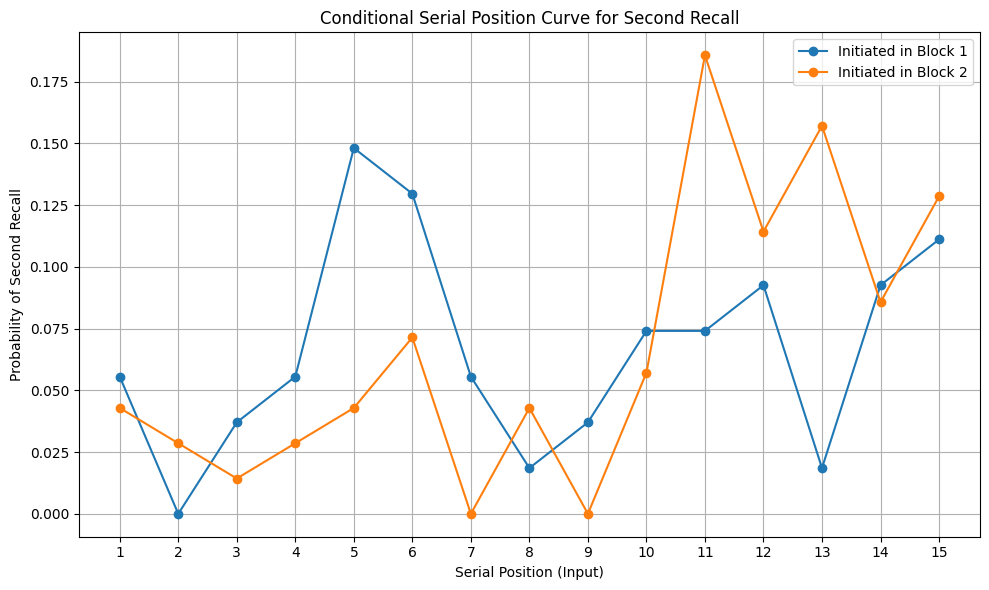

In [31]:
second_recalls = data[(data['recall']) & (data['output'] == 2)].copy()

block_info = data[['subject', 'list', 'block_success_group']].drop_duplicates()


if 'block_success_group' in second_recalls.columns:
    second_recalls = second_recalls.drop(columns=['block_success_group'])

second_recalls = second_recalls.merge(block_info, on=['subject', 'list'], how='left')

second_recalls = second_recalls.dropna(subset=['block_success_group'])

second_recalls['block_success_group'] = second_recalls['block_success_group'].astype(int)

serial_counts = second_recalls.groupby(['block_success_group', 'input']).size().unstack(fill_value=0)

serial_probs = serial_counts.div(serial_counts.sum(axis=1), axis=0)

plt.figure(figsize=(10, 6))
for group in [1, 2]:
    if group in serial_probs.index:
        plt.plot(
            serial_probs.columns,
            serial_probs.loc[group],
            marker='o',
            label=f'Initiated in Block {group}'
        )

plt.title('Conditional Serial Position Curve for Second Recall')
plt.xlabel('Serial Position (Input)')
plt.ylabel('Probability of Second Recall')
plt.xticks(range(1, 16))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

**Analysis 6**: Conditional Serial Position Curve for Second Recall. 

One of the issues with using the P2R to draw conclusions about the likelihood of making transitions to neighbors after a 'block_cue' is that it doesn't account for the fact that one block item will automatically be eliminated from the pool of possible recall words after the first recall event. Therefore, a P2R plotting the conditional serial position curve for second recall will give a better sense of how participants response to successful block cue recalls. 

As we can see, more evidence is lent to the idea that you are more likely to continue recall with items within the same block you initiate in. The blue curve, denoting an initiation in block 1 (4,5,6), has a higher observed conditional response probability compared to the block 2 items, with a similar trend observed in the orange curve, which denotes initiation in block 2 (10,11,12). 

Whether this hightened probability of recall in the same block recall was initiated in is significant must be determined from other methods. However, this is an indicator that there may be temporal contextual reinstatement ocurring. 


# Analysis 7: Looking More Into Isolates

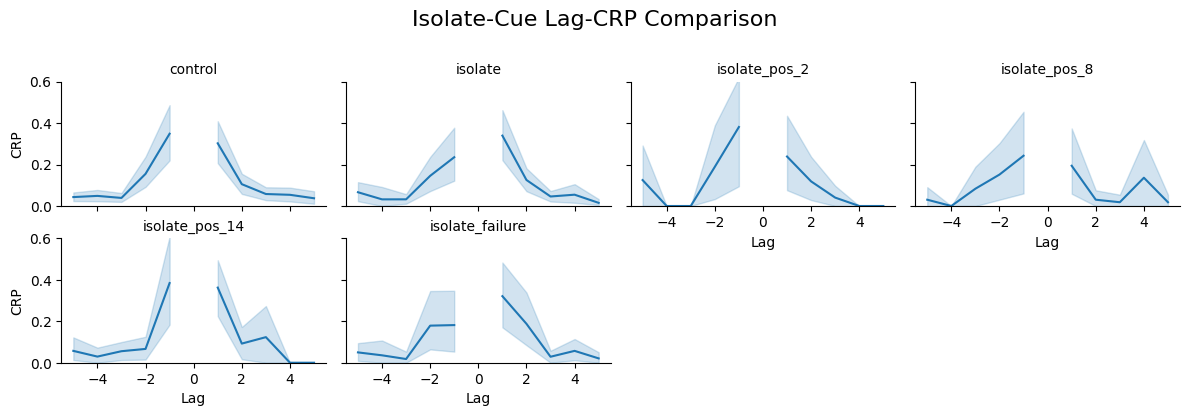

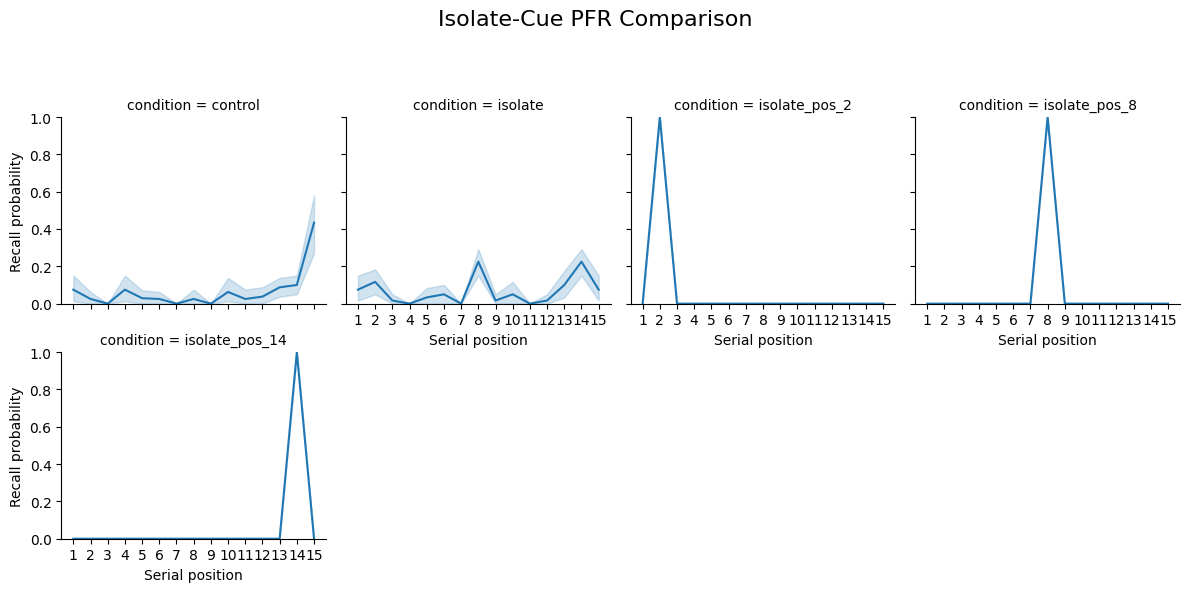

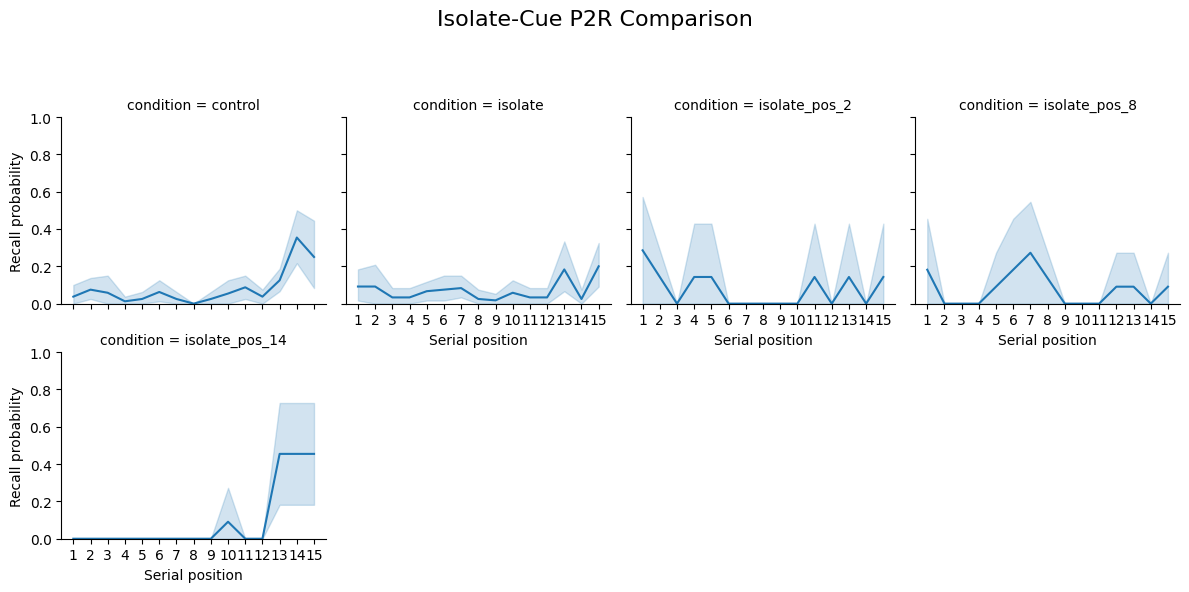

In [32]:
# %% Lag-CRP: Isolates-Focused

crp_control = fr.lag_crp(data.query('cue_type == "control"'))
crp_isolate = fr.lag_crp(data.query('cue_type == "isolate"'))
crp_isolate_2 = fr.lag_crp(data.query('cue_type == "isolate" and cue_isolate_position == 2 and target_success == True'))
crp_isolate_8 = fr.lag_crp(data.query('cue_type == "isolate" and cue_isolate_position == 8 and target_success == True'))
crp_isolate_14 = fr.lag_crp(data.query('cue_type == "isolate" and cue_isolate_position == 14 and target_success == True'))
crp_isolate_failure = fr.lag_crp(data.query('cue_type == "isolate" and target_success == 0'))

lag_crp = pd.concat([
    crp_control.assign(condition="control"),
    crp_isolate.assign(condition="isolate"),
    crp_isolate_2.assign(condition="isolate_pos_2"),
    crp_isolate_8.assign(condition="isolate_pos_8"),
    crp_isolate_14.assign(condition="isolate_pos_14"),
    crp_isolate_failure.assign(condition="isolate_failure"),
])

g = fr.plot_lag_crp(lag_crp, col="condition", col_wrap=4)
g.fig.set_size_inches(12, 4)
plt.ylim([0, 0.6])
g.set_titles("{col_name}")

# Add an overall title
g.fig.suptitle("Isolate-Cue Lag-CRP Comparison", fontsize=16)
g.fig.subplots_adjust(top=0.80)

pnr_control = fr.pnr(data.query('cue_type == "control"'))
pnr_isolate_2 = fr.pnr(data.query('cue_type == "isolate" and cue_isolate_position == 2 and target_success == True'))
pnr_isolate_8 = fr.pnr(data.query('cue_type == "isolate" and cue_isolate_position == 8 and target_success == True'))
pnr_isolate_14 = fr.pnr(data.query('cue_type == "isolate" and cue_isolate_position == 14 and target_success == True'))


pnr = pd.concat(
    [
        pnr_control.assign(condition="control"),
        pnr_isolate_2.assign(condition="isolate_pos_2"),
        pnr_isolate_8.assign(condition="isolate_pos_8"),
        pnr_isolate_14.assign(condition="isolate_pos_14"),
    ]
)

pfr = pnr.query("output == 1")
g = fr.plot_spc(pfr, col="condition", col_wrap=4)

plt.xticks(
    np.arange(1, 16),
    [str(i) for i in range(1, 16)],
)

g.fig.suptitle("Isolate-Cue PFR Comparison", fontsize=16)
g.fig.subplots_adjust(top=0.80)

p2r = pnr.query("output == 2")
g = fr.plot_spc(p2r, col="condition", col_wrap=4)

plt.xticks(
    np.arange(1, 16),
    [str(i) for i in range(1, 16)],
)

g.fig.suptitle("Isolate-Cue P2R Comparison", fontsize=16)
g.fig.subplots_adjust(top=0.80)

**Analysis 7**: Looking More Into Isolates

After adding an isolate cue position column into the dataframe, we are now able to look at each specific isolate position that was cued (pos. 2, 8, and 14). The graphs shown only plot when someone successfully recalled an isolate-cued item, not all isolate cueing events (failures are excluded). 

Shown from the Lag-CRPs of isolate cues at pos. 2 and 14, there seems to be stronger temporal contiguity here rather than at pos. 8, which is to be expected since these positions benefit from primacy and recency effects.

A sanity check confirms that the isolate-cue positions were divided correctly as shown in the PFR. 

However, more data may be necessary to take a look at the P2R, since they seem very noisy. If the DF column was done correctly (see PFR) then we shouldn't see an above zero probaility of second recall for the cued isolate positions.



# Analysis 8: Mixed-Effects Logistic Model

Need to ask Jordan about specific code for this, but here is a results summary:

We conducted a mixed effects logistic regression; in successful block-cued trials, we treat absolute lag, category of the recalled item, and distance from the final item of the list as individual predictors of second recall. This approach partials out the shared variance between semantic and temporal contiguity in our design, making each coefficient reflect the unique contribution of each predictor, while controlling for the other. Of the fourteen remaining possible recalls after successful cued retrieval, we found that the odds of recall declined by 9% for each additional list position of separation (b=-0.094, p = .0106), and same‐category items were nearly twice as likely to be chosen (b=0.657, p = .0011), even after controlling for a strong recency bias (b=-0.122, p < .00001). These results demonstrate simultaneous temporal and semantic context reinstatement in the first transition after a cued recall in block trials. 


# Analysis 9: Distance CRP

,subject,list,item,input,output,study,recall,repeat,intrusion,condition,...,listLength,trial_category_cue,category,cue_type,block_success_group,cue_isolate_position,prior_list,prior_input,item_name,item_index
0,0,1,319,1,NaN,True,False,0,False,2,...,15,26,18,block,1,NaN,NaN,NaN,grasshopper,318
1,0,1,192,2,NaN,True,False,0,False,2,...,15,26,11,block,1,NaN,NaN,NaN,lithium,191
2,0,1,130,3,NaN,True,False,0,False,2,...,15,26,8,block,1,NaN,NaN,NaN,chartreuse,129
3,0,1,442,4,2.0,True,True,0,False,2,...,15,26,26,block,1,NaN,NaN,NaN,illinois,441
4,0,1,445,5,NaN,True,False,0,False,2,...,15,26,26,block,1,NaN,NaN,NaN,kansas,444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4629,19,15,434,12,10.0,True,True,0,False,0,...,15,0,25,control,0,NaN,NaN,NaN,swimming,433
4630,19,15,193,13,NaN,True,False,0,False,0,...,15,0,11,control,0,NaN,NaN,NaN,magnesium,192
4631,19,15,337,14,2.0,True,True,0,False,0,...,15,0,20,control,0,NaN,NaN,NaN,blender,336
4632,19,15,337,14,11.0,False,True,1,False,0,...,15,0,20,control,0,NaN,NaN,NaN,blender,336


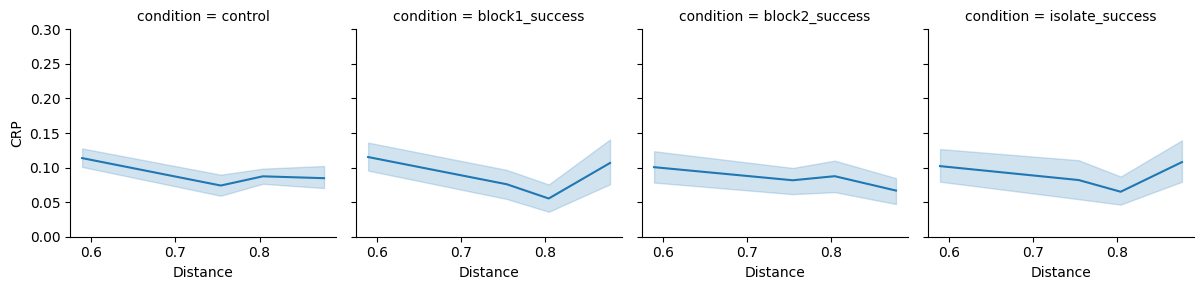

In [36]:
from sentence_transformers import SentenceTransformer
from scipy.spatial.distance import pdist, squareform

with open("/Users/roberttornatore/Desktop/JATOS/study_assets_root/online_experiments/experiments/block_cat/assets/cuefr_pool.txt", "r", encoding="utf-8") as f:
    item_pool = [line.strip().lower() for line in f if line.strip()]

data['item_name'] = data['item'].astype(int).apply(lambda i: item_pool[i - 1])

data['item_name'] = data['item_name'].str.strip().str.lower()

data['item_index'] = fr.pool_index(data['item_name'], item_pool)

model = SentenceTransformer('all-mpnet-base-v2')
embeddings = model.encode(item_pool)
cosine_distances = squareform(pdist(embeddings, metric='cosine'))

edges = np.percentile(squareform(cosine_distances), np.linspace(1, 99, 5))

dist_crp_control = fr.distance_crp(data.query('cue_type == "control"'), 'item_index', cosine_distances, edges)
dist_crp_block1_success = fr.distance_crp(data.query('block_success_group == 1'), 'item_index', cosine_distances, edges)
dist_crp_block2_success = fr.distance_crp(data.query('block_success_group == 2'), 'item_index', cosine_distances, edges)
dist_crp_isolate_success = fr.distance_crp(data.query('cue_type == "isolate" and target_success == True'), 'item_index', cosine_distances, edges)

dist_crp = pd.concat([dist_crp_control.assign(condition='control'), 
                      dist_crp_block1_success.assign(condition='block1_success'), 
                      dist_crp_block2_success.assign(condition='block2_success'), 
                      dist_crp_isolate_success.assign(condition='isolate_success'),
                      ])

g = fr.plot_distance_crp(dist_crp, col='condition', col_wrap=5)
g.set(ylim=(0, 0.3))

data

**Analysis 9**: Distance CRP.

There seems to be an odd dip in CRP around mid-range (0.7-0.8) distances for all conditions plotted here, except for the block 2 success condition. The same word pool is being used across these experiments, so it doesn't seem right that this is a result of few item pairs in the data set at these distances. Maybe this is another case of needing more data to smooth out these curves, as the overall trend seems to be the presence of semantic contiguity moreso in the block conditions than the control ones.

# V. Discussion

## I. Experiment 1: Category Targeting (LL = 12)

### a. Results

Results from Experiment 1 are largely in favor of the idea that category targeting in these circumstances result in decreased temporal contiguity in successive responses. With a dampened lag-CRP compared to control conditions in every analysis, as well as significantly lower Lag-Rank scores in these circumstances, it is safe to assume that temporal contextual reinstatement is not significnantly guiding recall sequences. 

### b. Further Work

While in concept, Experiment 1 is a good complement to the change in category structure in Experiment 3, a bug was found in which each participant received the same word lists. While this is not likely to drastically change the results, it would be beneficial to repeat Experiment 1, but with a LL = 15 to be a more direct complement to Experiment 3. By doing so, we can target the same positions targeted in Experiment 3 to get a more direct comparison between the two when it comes to recall sequences after category targeting.

## II. Experiment 2: Category Targeting (LL = 6)

### a. Results

Results from Experiment 2 are largely the same as those we saw in Experiment 1. The hypothesized effect of shortening list length was not observed, but may point to some change in temporal contiguity as a result of list length shortening (lag-CRPs of exp 2. vs exp. 1)

### b. Further Work

Not sure if any future work is necessary for Experiment 2. 

## II. Experiment 3: Block Cat

### a. Results

The most critical result from Experiment 3 is that which explains recall behavior after cueing a block item. Based on the results from this experiment (Lag-CRP, Lag-Rank, Conditional P2R, and Mixed-Effects Regression), we have solid evidence that both semantic context and temporal context reinstatement are guiding recall. However, interestingly, while we expected the isolate cues to have a lower temporal contiguity compared to block cues, these trials actually had a higher temporal contiguity. A column was added to the data frame to observe the behavior of each specific isolate cue position, which shows similar results, and emphasizing that this contiguity is not necessarily from jumping to a nearby block, but because of transitions to temporal neighbors. 

### b. Further Work

As previously mentioned, a repeat of experiment 1 with a list length of 15 words will be a nice complement to this experiment. If we cue the same positions we cued in Experiment 3, then we will have a direct comparison for how the category structure in Exp. 3 changes temporal contiguity of responses. I would expect that, in an Exp. 1 repeat, cueing isolate position 8 will not result in the same temporal contiguity observed in Exp. 3. 
